<a href="https://colab.research.google.com/github/jeffersonramelo/Minicurso_Decision_Tree/blob/main/Curso_II_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bagging - Random Forest.

MODELO DE REGRESSÃO PARA PREVISÃO DE PREÇOS DE CASAS.

Mean Squared Error (MSE) Médio no Treino: 2908171635.39 ± 37043835.50
R-squared (R2) Médio no Treino: 0.78 ± 0.00
Mean Squared Error (MSE) Médio no Teste: 3352376476.47 ± 209204624.42
R-squared (R2) Médio no Teste: 0.75 ± 0.02
OOB Score Médio: 0.7478 ± 0.0029


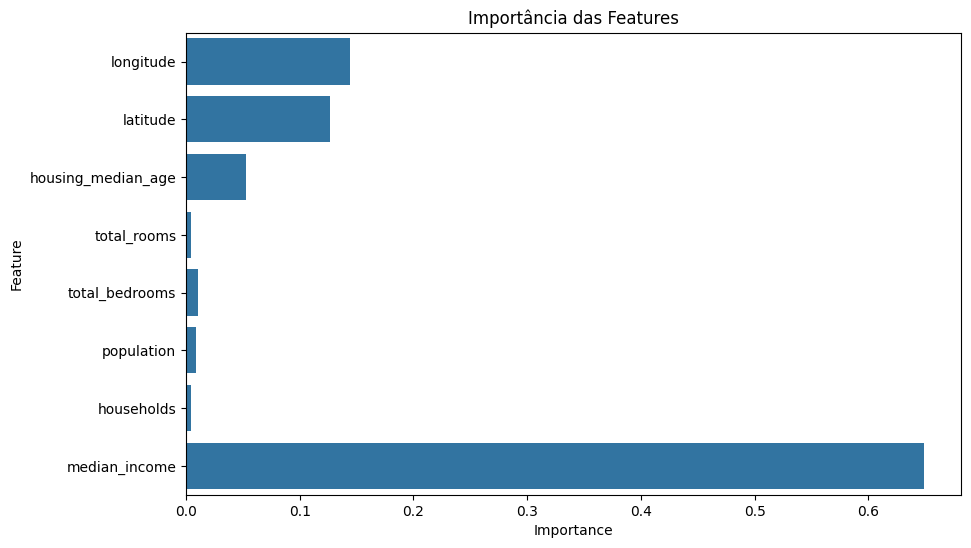

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Selecionar as features (X) e o target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Criar o modelo Random Forest para regressão com OOB ativado
model = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=15,
                              min_samples_leaf=10, random_state=42, oob_score=True)

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []
oob_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

    # Armazenar o OOB score
    oob_scores.append(model.oob_score_)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

mean_oob_score = np.mean(oob_scores)
std_oob_score = np.std(oob_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")
print(f"OOB Score Médio: {mean_oob_score:.4f} ± {std_oob_score:.4f}")

# Treinar o modelo em todos os dados
model.fit(X, y)

# Calcular a importância das features
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Importância das Features')
plt.show()


BOOSTING - ADABOOST

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Mean Squared Error (MSE) Médio no Treino: 2923636916.78 ± 48635324.26
R-squared (R2) Médio no Treino: 0.78 ± 0.00
Mean Squared Error (MSE) Médio no Teste: 3754308123.46 ± 146740306.37
R-squared (R2) Médio no Teste: 0.72 ± 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


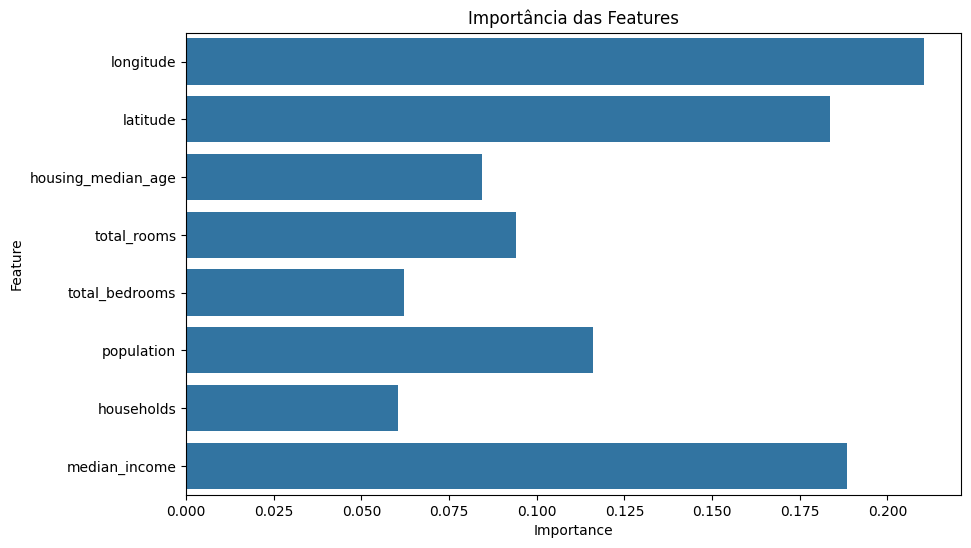

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Selecionar as features (X) e o target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Criar o modelo AdaBoost para regressão
base_estimator = DecisionTreeRegressor(max_depth=8, min_samples_split=15, min_samples_leaf=10, random_state=42)
model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")

# Treinar o modelo em todos os dados
model.fit(X, y)

# Calcular a importância das features
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Importância das Features')
plt.show()


BOOSTING - GRADIENT BOOSTING

Mean Squared Error (MSE) Médio no Treino: 1820283484.29 ± 15438929.70
R-squared (R2) Médio no Treino: 0.86 ± 0.00
Mean Squared Error (MSE) Médio no Teste: 2471886881.77 ± 137021448.00
R-squared (R2) Médio no Teste: 0.82 ± 0.01


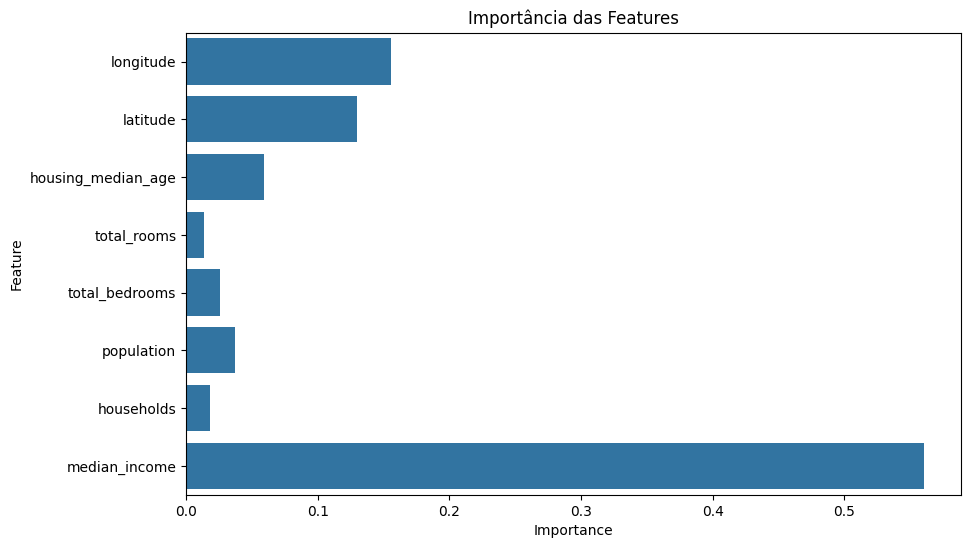

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Selecionar as features (X) e o target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Criar o modelo Gradient Boosting para regressão
model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1,
                                  subsample=0.6, random_state=42)

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")

# Treinar o modelo em todos os dados
model.fit(X, y)

# Calcular a importância das features
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Importância das Features')
plt.show()


BOOSTING - GRADIENT BOOSTING - XGBOOST

Mean Squared Error (MSE) Médio no Treino: 766770396.55 ± 10465827.61
R-squared (R2) Médio no Treino: 0.94 ± 0.00
Mean Squared Error (MSE) Médio no Teste: 2189403790.68 ± 150060158.25
R-squared (R2) Médio no Teste: 0.84 ± 0.01


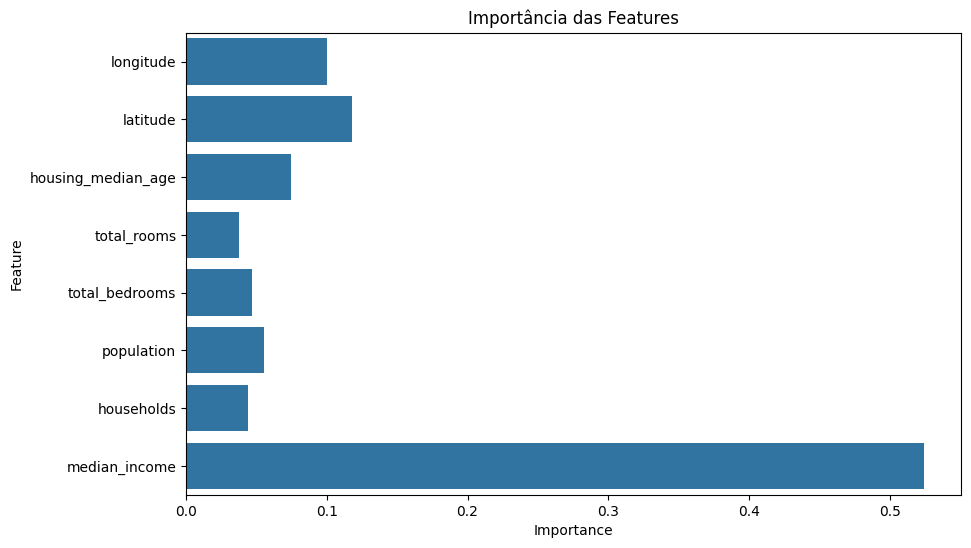

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Carregar a base de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Selecionar as features (X) e o target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Criar o modelo XGBoost para regressão
model = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1,
                         subsample=0.8, colsample_bytree=0.8, random_state=42)

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")

# Treinar o modelo em todos os dados
model.fit(X, y)

# Calcular a importância das features
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Importância das Features')
plt.show()


BOOSTING - GRADIENT BOOSTING - LIGHTBGM

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 15300, number of used features: 8
[LightGBM] [Info] Start training from score 206867.400131
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 15300, number of used features: 8
[LightGBM] [Info] Start training from score 207207.263464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_col_wise=true` to remove the overhe

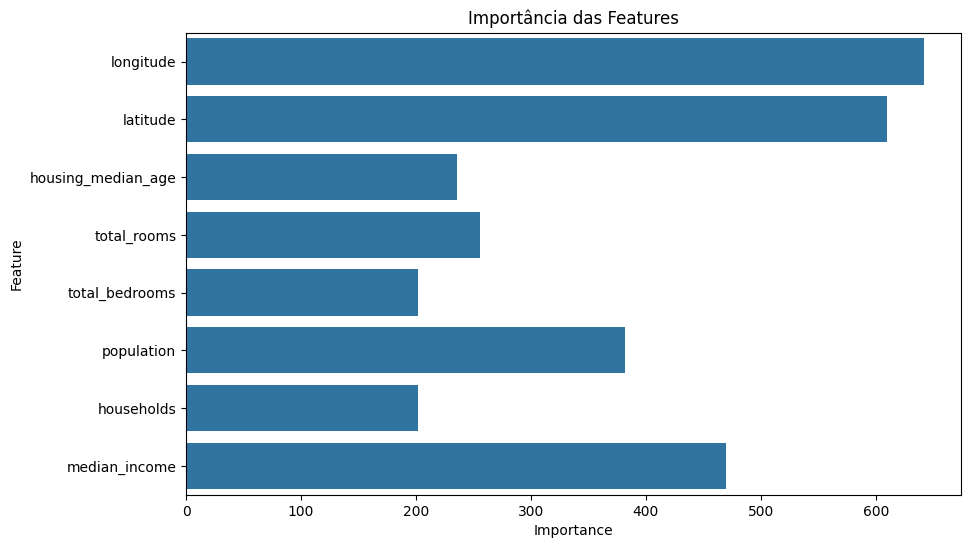

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# Carregar a base de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Selecionar as features (X) e o target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Criar o modelo LightGBM para regressão
model = lgb.LGBMRegressor(n_estimators=100, max_depth=8, learning_rate=0.1,
                          subsample=0.8, colsample_bytree=0.8, random_state=42)

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")

# Treinar o modelo em todos os dados
model.fit(X, y)

# Calcular a importância das features
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Importância das Features')
plt.show()


STARKING

Mean Squared Error (MSE) Médio no Treino: 2467773595.13 ± 80939360.47
R-squared (R2) Médio no Treino: 0.82 ± 0.01
Mean Squared Error (MSE) Médio no Teste: 2897293945.08 ± 210803014.96
R-squared (R2) Médio no Teste: 0.78 ± 0.01


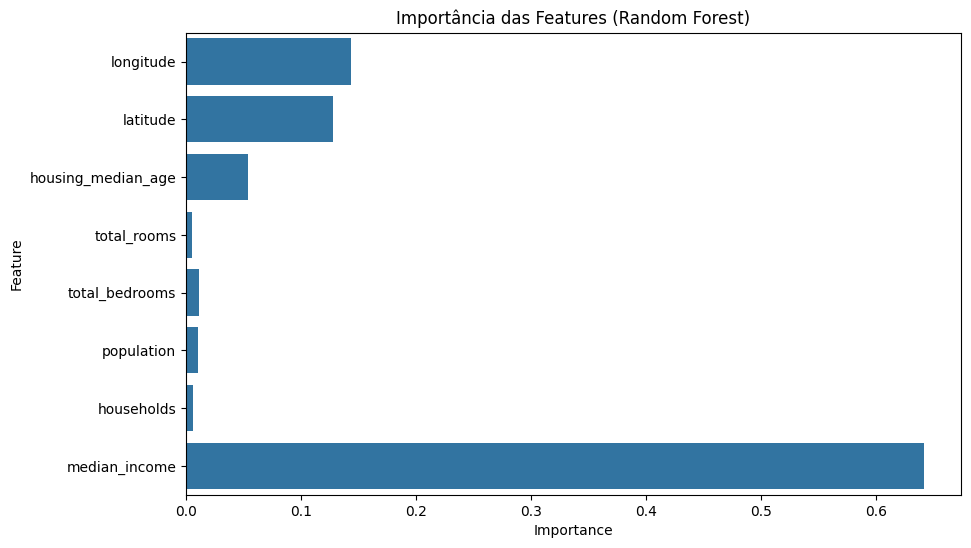

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Selecionar as features (X) e o target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Definir os modelos base (base learners)
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=50, max_depth=8, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42))
]

# Definir o modelo meta
meta_learner = LinearRegression()

# Criar o modelo Stacking
model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")

# Treinar o modelo em todos os dados
model.fit(X, y)

# Calcular a importância das features (para Random Forest base learner)
rf_model = model.named_estimators_['rf']
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Importância das Features (Random Forest)')
plt.show()


VOTING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Selecionar as features (X) e o target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Criar os modelos que serão combinados no Voting Regressor
model1 = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
model2 = GradientBoostingRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, random_state=42)
model3 = LinearRegression()

# Criar o Voting Regressor
model = VotingRegressor(estimators=[('rf', model1), ('gbr', model2), ('lr', model3)])

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")

# Treinar o modelo em todos os dados
model.fit(X, y)

# Calcular a importância das features do RandomForest (um dos modelos)
feature_importances = model1.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Importância das Features (Random Forest)')
plt.show()


Mean Squared Error (MSE) Médio no Treino: 1993783874.57 ± 14819998.48
R-squared (R2) Médio no Treino: 0.85 ± 0.00
Mean Squared Error (MSE) Médio no Teste: 2861201565.13 ± 165334804.37
R-squared (R2) Médio no Teste: 0.79 ± 0.01


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.